# Water Pumps in Tanzania

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Makes graphics look better
sns.set() 

## Loading The Data

In [4]:
!head IndependentVariables.csv

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000.0,2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,u

In [5]:
!head DependentVariables.csv

id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional
19816,non functional
54551,non functional
53934,non functional


In [2]:
# load the datasets
water = pd.read_csv('WaterPumpObservations.csv')

In [3]:
pumps = pd.read_csv('WaterPumps.csv')

In [8]:
# check that data was correctly loaded
water.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [10]:
water.shape
pumps.shape

(59400, 2)

In [4]:
# merge dataframes
water_pumps_df = pd.merge(water, pumps)

In [5]:
#Saving a new csv file with merged dataset
water_pumps_df.to_csv('merged_water_pumps.csv')

In [7]:
water_pumps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
water_pumps_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


# Data Cleaning

## 1. Missing Values Analysis

In [11]:
# calculate the number of missing values in each column
water_pumps_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
# calculate the number of unique values in each column
water_pumps_df.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [14]:
# getting the percentage of missing values for each column into a dictionary
percent_missing = {}
for column in water_pumps_df.columns:
    percent_missing[column] = water_pumps_df[column].isnull().sum() / water_pumps_df.shape[0] *100

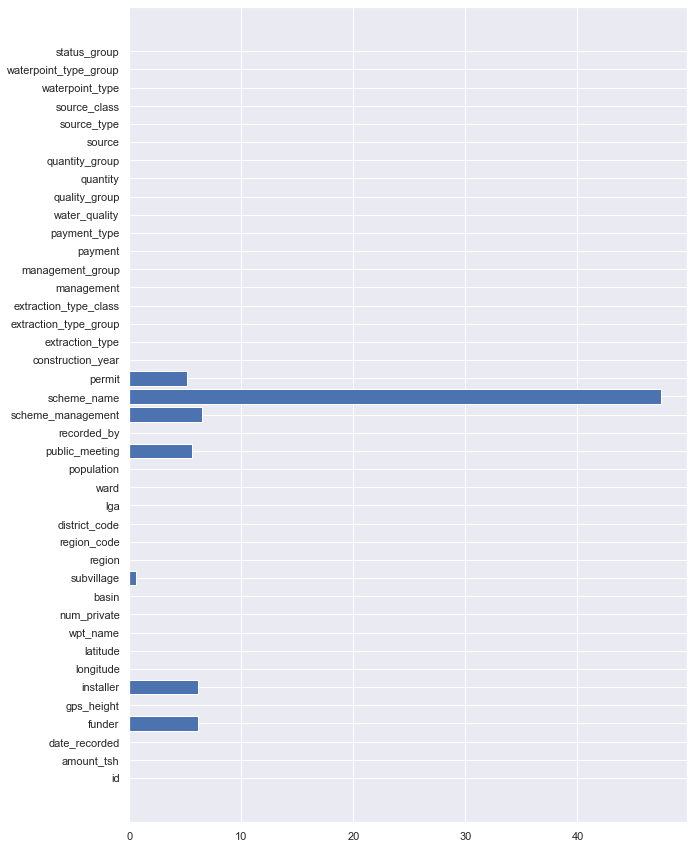

In [15]:
# bar plot displaying the percentage of missing values in each column
column = list(percent_missing.keys())
percent = list(percent_missing.values())

plt.figure(figsize=(10,15))
plt.barh(range(len(percent_missing)), percent, tick_label=column)
plt.show()

## 2. Droping Uneccessary Columns from the Dataset

In [8]:
# checking for possible redundancy for EXTRACTION variables--action needed
water_pumps_df[['extraction_type', 'extraction_type_group', 'extraction_type_class']]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


In [18]:
# checking for possible redundancy for SCHEME variables--action needed
water_pumps_df[['scheme_name', 'scheme_management']]

,scheme_name,scheme_management
0,Roman,VWC
1,NaN,Other
2,Nyumba ya mungu pipe scheme,VWC
3,NaN,VWC
4,NaN,NaN
...,...,...
59395,Losaa Kia water supply,Water Board
59396,Ikondo electrical water sch,VWC
59397,NaN,VWC
59398,NaN,VWC


In [11]:
# checking for possible redundancy for MANAGEMENT variables--action needed
water_pumps_df[['management', 'management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [12]:
# checking for possible redundancy for PAYMENT variables--action needed
water_pumps_df[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


In [5]:
# checking for possible redundancy for QUANTITY variables--action needed
water_pumps_df[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [6]:
# checking for possible redundancy for SOURCE variables--action needed
water_pumps_df[['source', 'source_type', 'source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [7]:
# checking for possible redundancy for WATER TYPE variables--action needed
water_pumps_df[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [21]:
# checking for possible redundancy for QUALITY variables--action needed
water_pumps_df[['water_quality', 'quality_group']]

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


In [8]:
# drop unecessary or redundant columns from the dataset
water_pumps_df.drop(['id', 'date_recorded', 'num_private', 'public_meeting', 'recorded_by', 'scheme_name', 'wpt_name'],axis=1, inplace=True)

In [9]:
water_pumps_df.drop(['extraction_type', 'extraction_type_group'],axis=1, inplace=True)

In [10]:
water_pumps_df.drop(['management', 'management_group'],axis=1, inplace=True)

In [11]:
water_pumps_df.drop(['payment'],axis=1, inplace=True)

In [12]:
water_pumps_df.drop(['quantity_group'],axis=1, inplace=True)

In [13]:
water_pumps_df.drop(['source', 'source_type'],axis=1, inplace=True)

In [14]:
water_pumps_df.drop(['waterpoint_type_group'],axis=1, inplace=True)

In [23]:
water_pumps_df.drop(['wpt_name'],axis=1, inplace=True)

In [ ]:
water_pumps_df.drop(['water_quality'],axis=1, inplace=True)

In [30]:
water_pumps_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [19]:
# checking for duplicate entries
water_pumps_df.duplicated().any()

False

## 3. Converting Categorical Features to Numeric Representations

In [27]:
# convert target variable to numerical values
water_pumps_df['status_group'] = water_pumps_df['status_group'].replace({'functional': 0, 'functional needs repair': 1, 'non functional': 2})

In [26]:
# the Catboost encoder will be used transform categorical features
import category_encoders as ce

In [34]:
temp_df = water_pumps_df.copy()

In [35]:
target = temp_df['status_group']

In [36]:
train = temp_df.drop('status_group', axis = 1)

In [37]:
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder(handle_missing='return_nan')

In [38]:
# encode categorical columns
cbe_encoder.fit(train, target)
train_cbe = cbe_encoder.transform(train)

In [40]:
train_cbe

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quality_group,quantity,source_class,waterpoint_type
0,6000.0,0.325511,1390,0.714117,34.938093,-9.856322,0.643500,0.405880,0.412435,11,...,0.905931,0.890347,1999,0.700640,0.427626,0.791295,0.791295,0.623040,0.855505,0.677798
1,0.0,0.385947,1399,0.321029,34.698766,-2.147466,0.908171,0.140194,1.069463,20,...,0.775543,0.821709,2010,0.700640,1.026938,0.791295,0.791295,0.857689,0.791795,0.677798
2,25.0,0.093462,686,0.559514,37.460664,-3.821329,0.744865,0.995708,0.692450,21,...,0.905931,0.821709,2009,0.700640,0.598914,0.791295,0.791295,0.623040,0.791795,1.161344
3,0.0,0.771116,263,0.887180,38.486161,-11.155298,1.183988,1.046731,1.321110,90,...,0.905931,0.821709,1986,0.881528,1.026938,0.791295,0.791295,1.943628,0.855505,1.161344
4,0.0,0.841162,0,0.844420,31.130847,-1.825359,0.908171,0.280387,0.866699,18,...,NaN,0.821709,0,0.700640,1.026938,0.791295,0.791295,0.749159,0.791795,0.677798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,0.235419,1210,0.235419,37.169807,-3.253847,0.744865,0.168232,0.720740,3,...,0.465566,0.821709,1999,0.700640,0.598914,0.791295,0.791295,0.623040,0.855505,0.677798
59396,4700.0,0.035048,1212,0.052573,35.249991,-9.070629,0.674419,0.056077,0.412435,11,...,0.905931,0.821709,1996,0.700640,0.427626,0.791295,0.791295,0.623040,0.791795,0.677798
59397,0.0,NaN,0,NaN,34.017087,-8.750434,0.674419,0.280387,0.891561,12,...,0.905931,0.890347,0,0.678607,0.567382,0.427070,0.494684,0.623040,0.855505,0.705463
59398,0.0,0.210290,0,0.806860,35.861315,-6.378573,0.674419,1.113646,0.988120,1,...,0.905931,0.821709,0,0.678607,1.026938,0.791295,0.791295,0.857689,0.855505,0.705463


In [41]:
# merge encoded dataframe and target column
water_pumps_df = train_cbe.join(target)

## 4. Impute Missing Values Using KNN Imputer

In [43]:
# scale the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_water_pumps_df = scaler.fit_transform(water_pumps_df)

In [45]:
scaled_water_pumps_df

array([[ 1.89566509, -1.47005735,  1.04125207, ...,  0.53998534,
        -0.49610572, -0.8856327 ],
       [-0.10597003, -1.29988156,  1.05423701, ..., -1.85860517,
        -0.49610572, -0.8856327 ],
       [-0.09762988, -2.12346169,  0.02554104, ..., -1.85860517,
         0.97229032, -0.8856327 ],
       ...,
       [-0.10597003,         nan, -0.96420011, ...,  0.53998534,
        -0.41209575, -0.8856327 ],
       [-0.10597003, -1.79449709, -0.96420011, ...,  0.53998534,
        -0.41209575, -0.8856327 ],
       [-0.10597003,  0.76673429, -0.68863079, ...,  0.53998534,
        -0.41209575, -0.8856327 ]])

In [46]:
# convert array back to a dataframe
scaled_water_pumps_df = pd.DataFrame(data = scaled_water_pumps_df, columns=water_pumps_df.columns, index=water_pumps_df.index)

In [50]:
# impute missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
filled_values = imputer.fit_transform(scaled_water_pumps_df)
filled_df = pd.DataFrame(data=filled_values, columns=scaled_water_pumps_df.columns, index=scaled_water_pumps_df.index)

In [51]:
# check for missing values
filled_df.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
payment_type             0
quality_group            0
quantity                 0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [53]:
#Saving a new csv file with cleaned dataset
filled_df.to_csv('cleaned_water_pumps_data.csv')

# Feature Selection